In [9]:
import numpy as np
from scipy.spatial.distance import cdist
from itertools import product

class RBFSurrogateModel:
    def __init__(self, epsilon=1.0):
        """
        Initialize the RBF Surrogate Model.

        Parameters:
        epsilon: float
            The shape parameter for the Gaussian RBF kernel. It controls the width of the Gaussian basis function.
        """
        self.epsilon = epsilon
        self.centers = None
        self.weights = None

    def _rbf_kernel(self, X1, X2):
        """
        Compute the RBF (Gaussian) kernel between two sets of data points.

        Parameters:
        X1: ndarray of shape (n_samples_X1, n_features)
            First set of data points.
        X2: ndarray of shape (n_samples_X2, n_features)
            Second set of data points.
        
        Returns:
        K: ndarray of shape (n_samples_X1, n_samples_X2)
            Kernel matrix.
        """
        # Compute the pairwise Euclidean distance between points in X1 and X2
        distances = cdist(X1, X2, 'euclidean')
        # Gaussian RBF: exp(-epsilon^2 * distance^2)
        K = np.exp(-(self.epsilon * distances) ** 2)
        return K

    def fit(self, X_train, y_train):
        """
        Train the RBF surrogate model on the training data.

        Parameters:
        X_train: ndarray of shape (n_samples, n_features)
            Training data inputs.
        y_train: ndarray of shape (n_samples,)
            Training data targets.
        """
        self.centers = X_train  # The centers of the RBF are the training data points
        # Compute the RBF kernel matrix for the training data
        K_train = self._rbf_kernel(X_train, X_train)
        # Solve the linear system K * weights = y_train to get the weights
        self.weights = np.linalg.solve(K_train, y_train)

    def predict(self, X_test):
        """
        Make predictions for new input data using the trained model.

        Parameters:
        X_test: ndarray of shape (n_samples_test, n_features)
            New data inputs for which predictions are to be made.

        Returns:
        y_pred: ndarray of shape (n_samples_test,)
            Predicted values for the input data.
        """
        # Compute the RBF kernel between the test data and the centers
        K_test = self._rbf_kernel(X_test, self.centers)
        # Multiply the kernel matrix by the weights to get predictions
        #apparently @ is python syntax for matrix multiplication...
        y_pred = K_test @ self.weights
        return y_pred


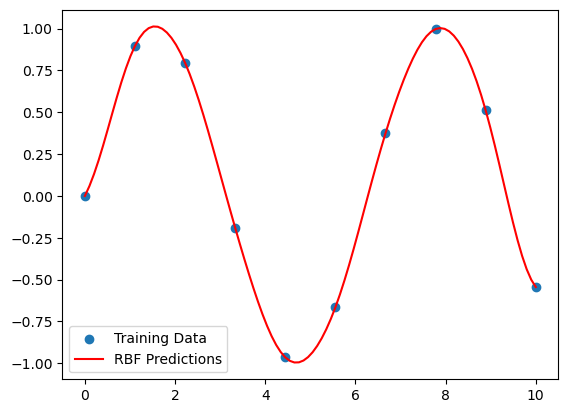

In [10]:
# Generate synthetic data for training
X_train = np.linspace(0, 10, 10).reshape(-1, 1)
y_train = np.sin(X_train).flatten()

# Instantiate the model
rbf_model = RBFSurrogateModel(epsilon=1)

# Train the model
rbf_model.fit(X_train, y_train)

# Generate test data and predict
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = rbf_model.predict(X_test)

# You can now plot the predictions and see how well the model fits the sine wave
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_test, y_pred, label='RBF Predictions', color='red')
plt.legend()
plt.show()


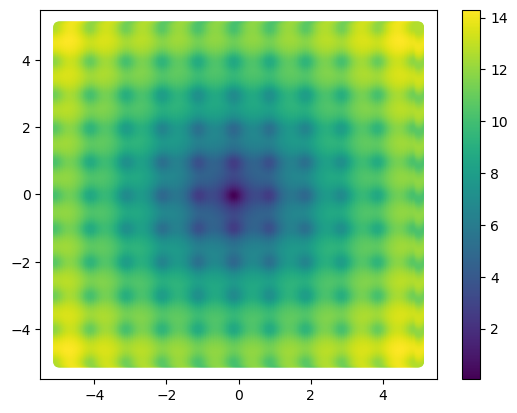

In [11]:
# def func2d(x,y):
#     z = np.sin(x)+(x*np.cos(0.5*y))
#     return z

# def func2d(x,y):
#     z = -20* np.exp(-0.2*np.sqrt(0.5*((x**2)+(y**2)))) - np.exp(0.5*(np.cos(2*np.pi*x + 2*np.pi*y))) + np.exp(1) + 20
#     return z

def func2d(x, y, a=20, b=0.2, c=2 * np.pi):
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)

x_range = np.linspace(-5,5,500)
y_range = np.linspace(-5,5,500)
fullRange = list(product(x_range, y_range))
fullRangeArray = np.array(fullRange)

zFullRange = func2d(fullRangeArray[:,0], fullRangeArray[:,1])

plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1], c = zFullRange)
plt.colorbar()



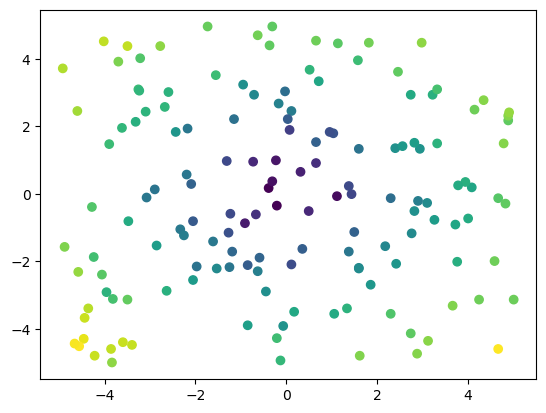

epsilon =  0.19913397470175337


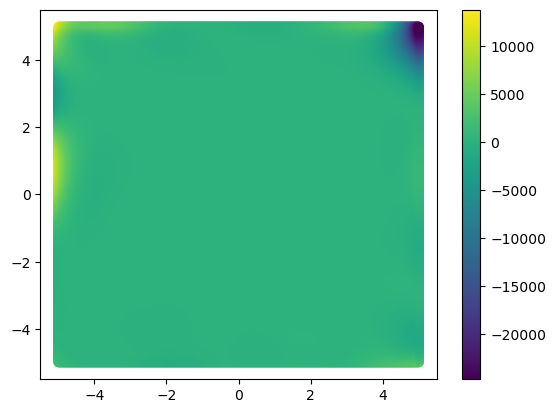

In [12]:
num_samples = 150
sampleX = np.random.choice(x_range, size=num_samples)
sampleY = np.random.choice(y_range, size=num_samples)

samplesXY = np.stack((sampleX, sampleY), axis=1)

# print(samplesXY)

samplesZ = func2d(samplesXY[:,0], samplesXY[:,1])
plt.figure()
plt.scatter(samplesXY[:,0], samplesXY[:,1], c = samplesZ)
plt.show()
# # Generate synthetic data for training
# X_train = np.linspace(0, 10, 10).reshape(-1, 1)
# y_train = np.sin(X_train).flatten()

# stdev = np.std(samplesZ)

# print(stdev)

#epsilon based on the average pairwise distance between training points
pairwise_distances = np.linalg.norm(samplesXY[:, np.newaxis] - samplesXY, axis=2)
avg_distance = np.mean(pairwise_distances)

print('epsilon = ', 1.0/avg_distance)

# Instantiate the model
rbf_model = RBFSurrogateModel(epsilon=1.0/avg_distance)

# Train the model
rbf_model.fit(samplesXY, samplesZ)


# # Generate test data and predict
# X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = rbf_model.predict(fullRangeArray)

plt.figure
plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1], c = y_pred)
plt.colorbar()
plt.show()
# # You can now plot the predictions and see how well the model fits the sine wave
# import matplotlib.pyplot as plt
# plt.scatter(X_train, y_train, label='Training Data')
# plt.plot(X_test, y_pred, label='RBF Predictions', color='red')
# plt.legend()
# plt.show()
#you can now plot the predictions and see how well the model fits the sine wave

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 150
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (150 x 150 mtx) ...
         Performing LU fact. (150 x 150 mtx) - done. Time (sec):  0.0011570
      Initializing linear solver - done. Time (sec):  0.0012188
      Solving linear system (col. 0) ...
         Back solving (150 x 150 mtx) ...
         Back solving (150 x 150 mtx) - done. Time (sec):  0.0001123
      Solving linear system (col. 0) - done. Time (sec):  0.0001431
   Training - done. Time (sec):  0.0022199
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 250000
   
   Predicti

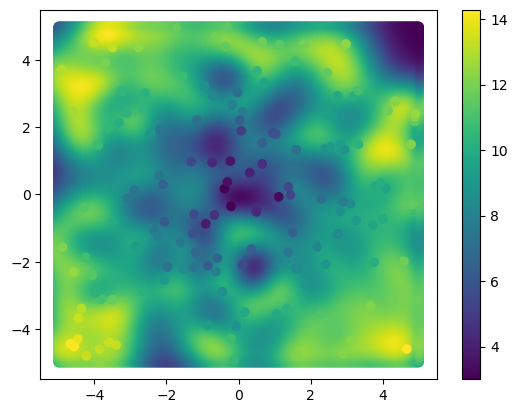

In [13]:
from smt.surrogate_models import RBF
from scipy.spatial.distance import pdist

distances = pdist(samplesXY)
epsilon = 1.0/np.mean(distances)

epsilon = 1


sm = RBF(d0 = epsilon)
sm.set_training_values(samplesXY, samplesZ)
sm.train()

y = sm.predict_values(fullRangeArray)

plt.figure
plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1], c = y)
plt.scatter(samplesXY[:,0], samplesXY[:,1], c = samplesZ)

plt.colorbar()
plt.show()

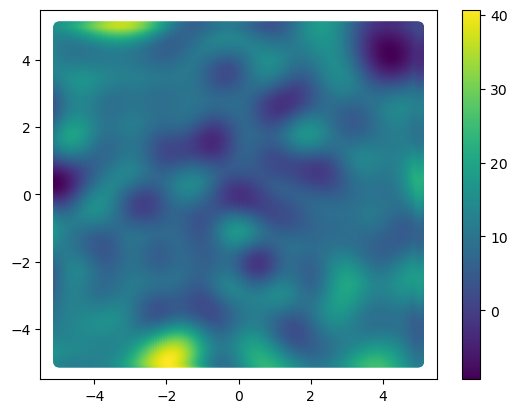

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp_model = GaussianProcessRegressor(normalize_y=True)
new_model = gp_model.fit(samplesXY, samplesZ)
y_pred, y_std = gp_model.predict(fullRangeArray, return_std=True)

plt.figure
plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1], c = y_pred)
# plt.scatter(samplesXY[:,0], samplesXY[:,1], c = samplesZ)

plt.colorbar()
plt.show()

In [15]:
import torch
import gpytorch

# constant_mean = gpytorch.means.ConstantMean(prior=gpytorch.priors.NormalPrior(max_value.item(), max_value.item()))


class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


tensorSamplesXY = torch.from_numpy(samplesXY)
tensorSamplesZ = torch.from_numpy(samplesZ)

likelihood = gpytorch.likelihoods.GaussianLikelihood() 
model = ExactGPModel(tensorSamplesXY, tensorSamplesZ, likelihood)
likelihood.noise = 1e-4
likelihood.noise_covar.raw_noise.requires_grad_(False)

training_iter = 200
# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(tensorSamplesXY)
    # Calc loss and backprop gradients
    loss = -mll(output, tensorSamplesZ)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(), #.kernels[0] after base_kernel if have multiple kernels
        model.likelihood.noise.item()
    ))
    optimizer.step()

Iter 1/200 - Loss: 28.446   lengthscale: 0.693   noise: 0.000
Iter 2/200 - Loss: 26.369   lengthscale: 0.668   noise: 0.000
Iter 3/200 - Loss: 24.997   lengthscale: 0.646   noise: 0.000
Iter 4/200 - Loss: 24.064   lengthscale: 0.626   noise: 0.000
Iter 5/200 - Loss: 23.358   lengthscale: 0.611   noise: 0.000
Iter 6/200 - Loss: 22.741   lengthscale: 0.600   noise: 0.000
Iter 7/200 - Loss: 22.139   lengthscale: 0.592   noise: 0.000
Iter 8/200 - Loss: 21.524   lengthscale: 0.588   noise: 0.000
Iter 9/200 - Loss: 20.893   lengthscale: 0.587   noise: 0.000
Iter 10/200 - Loss: 20.254   lengthscale: 0.588   noise: 0.000
Iter 11/200 - Loss: 19.620   lengthscale: 0.592   noise: 0.000
Iter 12/200 - Loss: 19.002   lengthscale: 0.596   noise: 0.000
Iter 13/200 - Loss: 18.413   lengthscale: 0.602   noise: 0.000
Iter 14/200 - Loss: 17.862   lengthscale: 0.608   noise: 0.000
Iter 15/200 - Loss: 17.353   lengthscale: 0.615   noise: 0.000
Iter 16/200 - Loss: 16.889   lengthscale: 0.622   noise: 0.000
I

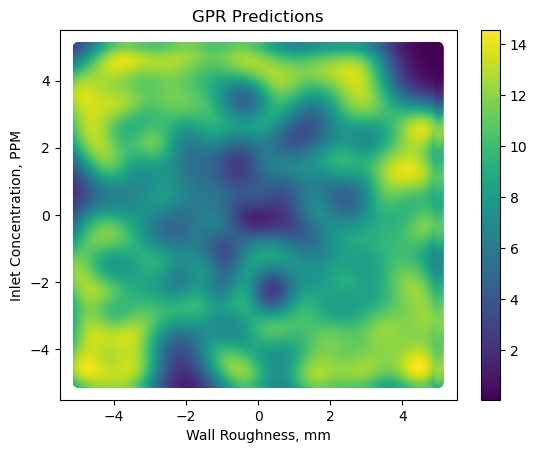

In [16]:
model.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = model(torch.from_numpy(fullRangeArray))

mean_pred = observed_pred.mean.numpy()

# fig, ax = plt.subplots(1, figsize=(15, 8))

plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1],  c = mean_pred)
plt.colorbar()
# plt.clim(0.01, 100)
# plt.clim(0, 20)

plt.xlabel('Wall Roughness, mm')
plt.ylabel('Inlet Concentration, PPM')
plt.title('GPR Predictions')
plt.show()
